In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [3]:
data = pd.read_csv("C:\\Users\\Fahad Engineering\\Desktop\\Data\\Data sets to work with\\Kaggle\\World Happiness\\world-happiness-report-2021.csv")
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


## Filter the data by columns necessary for analysis

In [4]:
data_columns = ['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

In [5]:
data = data[data_columns].copy()

## Rename the column names

In [18]:
happy_df = data.rename(columns = {'Country name': 'country_name','Regional indicator': 'regional_indicator','Ladder score': 'happiness_score','Logged GDP per capita': 'logged_GDP_per_capita','Social support': 'social_support','Healthy life expectancy': 'healthy_life_expectancy','Freedom to make life choices': 'freedom_to_make_life_choices','Generosity': 'generosity','Perceptions of corruption': 'perceptions_of_corruption'})

In [20]:
happy_df.head()

,country_name,regional_indicator,happiness_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


## Check if any columns has null values

In [21]:
happy_df.isna().sum()

country_name                    0
regional_indicator              0
happiness_score                 0
logged_GDP_per_capita           0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

#### There are no null values in the dataset

## Visualisation : Plot Happiness score vs GDP per capita

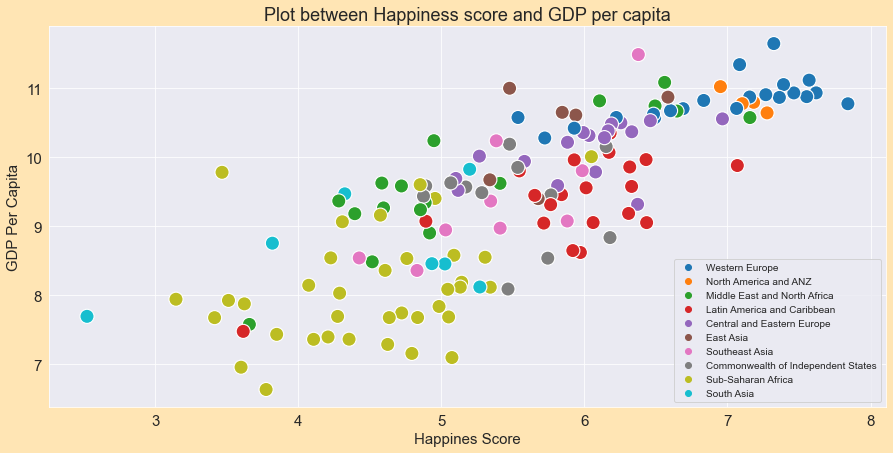

In [24]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between Happiness score and GDP per capita')

sns.scatterplot(x=happy_df.happiness_score, y=happy_df.logged_GDP_per_capita, hue=happy_df.regional_indicator, s=200);

plt.legend(loc='best', fontsize='10')
plt.xlabel('Happines Score')
plt.ylabel('GDP Per Capita')
plt.show()

## Visualisation : GDP per capita by Region (Percentage)

For that, first we will groupby the GDP per capita by region and sum it.

In [25]:
gdp_region = happy_df.groupby('regional_indicator')['logged_GDP_per_capita'].sum()
gdp_region

regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: logged_GDP_per_capita, dtype: float64

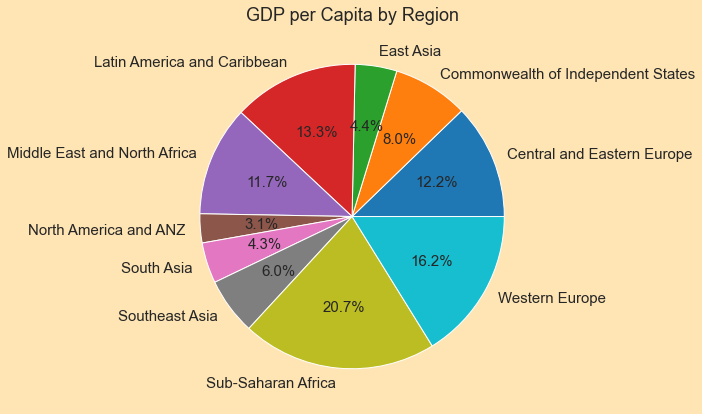

In [28]:
gdp_region.plot.pie(autopct='%1.1f%%')
plt.title('GDP per Capita by Region')
plt.ylabel('');

## Find out the Total number of countries in each region

In [30]:
# Total Countries

total_country = happy_df.groupby('regional_indicator')['country_name'].count()
total_country

regional_indicator
Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           20
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    36
Western Europe                        21
Name: country_name, dtype: int64

## Plot a correlation map to see the relationship between variables of the Dataset

C:\Users\FAHADE~1\AppData\Local\Temp/ipykernel_17320/3113417501.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap='Blues', square=False, ax=ax);


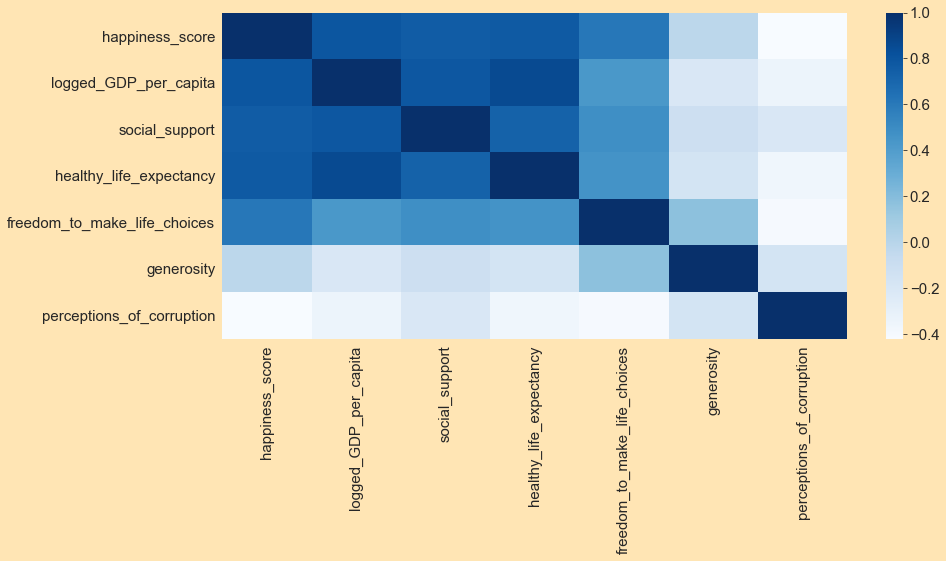

In [36]:
# Corerlation map

cor = happy_df.corr(method='pearson')
f,ax = plt.subplots(figsize=(14,6))
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap='Blues', square=False, ax=ax);

## Visualisation : Corruption in different regions

In [38]:
corruption = happy_df.groupby('regional_indicator')['perceptions_of_corruption'].mean()
corruption

regional_indicator
Central and Eastern Europe            0.850529
Commonwealth of Independent States    0.725083
East Asia                             0.683333
Latin America and Caribbean           0.792600
Middle East and North Africa          0.762235
North America and ANZ                 0.449250
South Asia                            0.797429
Southeast Asia                        0.709111
Sub-Saharan Africa                    0.765944
Western Europe                        0.523095
Name: perceptions_of_corruption, dtype: float64

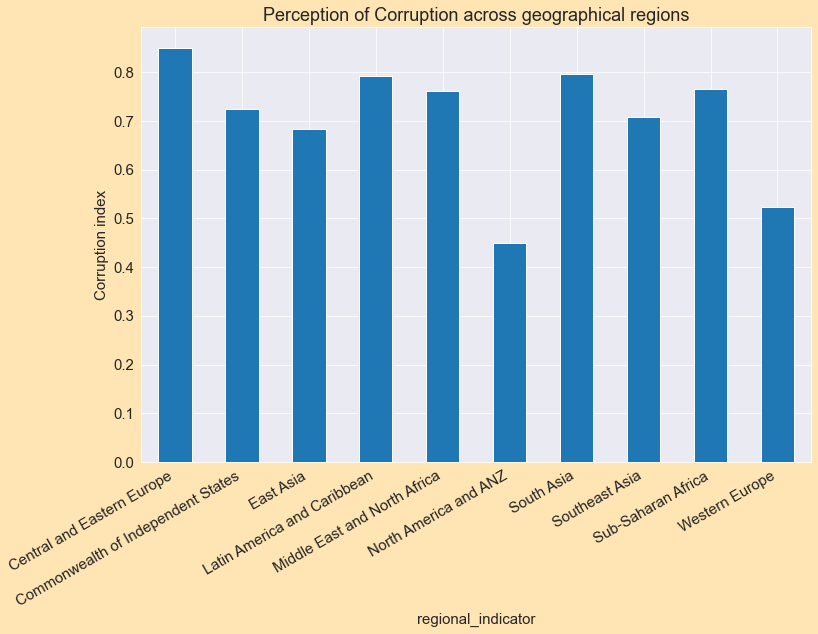

In [53]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('Perception of Corruption across geographical regions')
plt.xlabel('Region', fontsize=15)
plt.ylabel('Corruption index', fontsize=15)
plt.xticks(ha='right')

corruption.plot.bar(x='regional_indicator' , y='corruption.perceptions_of_corruption', rot=30);

## Life expectancy of Top 10 Happiest and Bottom 10 Happiest

In [54]:
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

C:\Users\FAHADE~1\AppData\Local\Temp/ipykernel_17320/1009930282.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
C:\Users\FAHADE~1\AppData\Local\Temp/ipykernel_17320/1009930282.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels, rotation=45, ha='right')


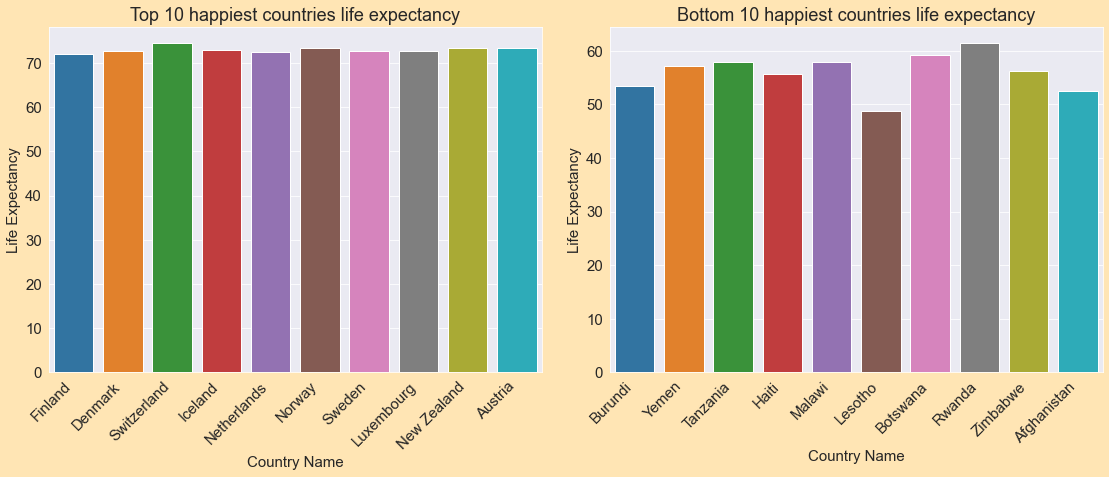

In [69]:
fig, axes = plt.subplots(1,2, figsize=(16,6))
plt.tight_layout(pad=2)

xlabels = top_10.country_name
axes[0].set_title('Top 10 happiest countries life expectancy')
axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=top_10.country_name, y=top_10.healthy_life_expectancy, ax=axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life Expectancy')

xlabels = bottom_10.country_name
axes[1].set_title('Bottom 10 happiest countries life expectancy')
axes[1].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=bottom_10.country_name, y=bottom_10.healthy_life_expectancy, ax=axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life Expectancy');

## Visualisation : Freedom to make life choices vs Happiness score

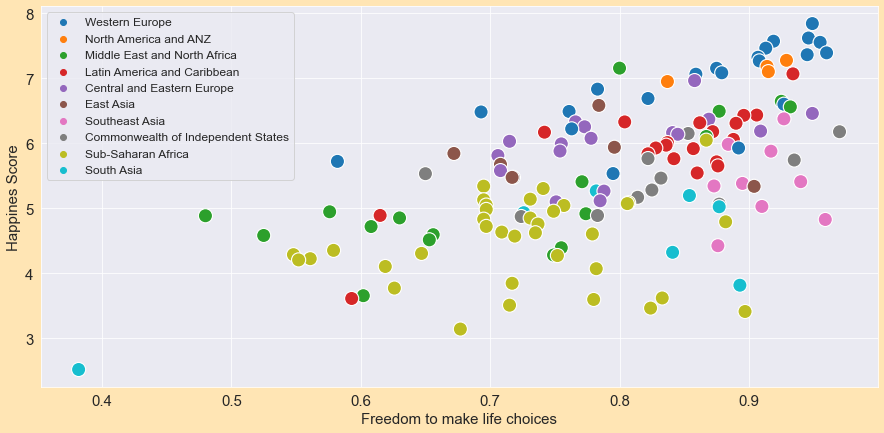

In [71]:
plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x=happy_df.freedom_to_make_life_choices, y=happy_df.happiness_score, hue=happy_df.regional_indicator, s=200)
plt.legend(loc='best', fontsize='12')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happines Score');

## Visualisation : Top 10 lowest corrupt countries

In [72]:
country = happy_df.sort_values(by='perceptions_of_corruption').head(10)
country

,country_name,regional_indicator,happiness_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
31,Singapore,Southeast Asia,6.377,11.488,0.915,76.953,0.927,-0.018,0.082
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
6,Sweden,Western Europe,7.363,10.867,0.934,72.700,0.945,0.086,0.237
8,New Zealand,North America and ANZ,7.277,10.643,0.948,73.400,0.929,0.134,0.242
5,Norway,Western Europe,7.392,11.053,0.954,73.300,0.960,0.093,0.270
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338
14,Ireland,Western Europe,7.085,11.342,0.947,72.400,0.879,0.077,0.363


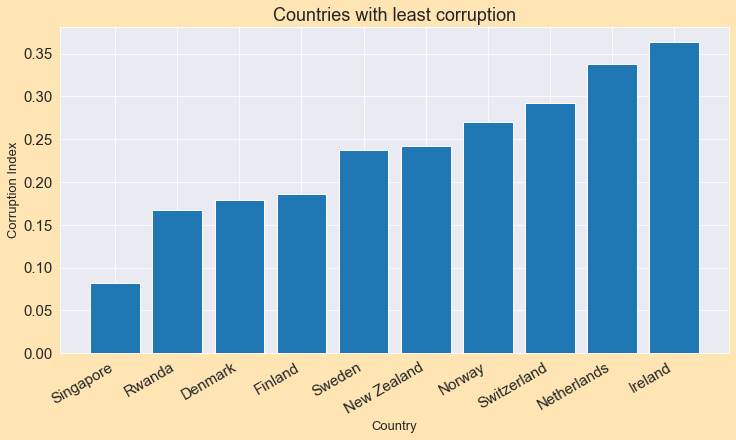

In [73]:
plt.rcParams['figure.figsize'] = (12,6)
plt.title('Countries with least corruption')
plt.xlabel('Country', fontsize=13)
plt.ylabel('Corruption Index', fontsize=13)
plt.xticks(rotation=30, ha='right')
plt.bar(country.country_name, country.perceptions_of_corruption);

## Visualisation : Top 10 Highest corrupt countries

In [74]:
country = happy_df.sort_values(by='perceptions_of_corruption').tail(10)
country

,country_name,regional_indicator,happiness_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
33,Slovakia,Central and Eastern Europe,6.331,10.369,0.936,69.201,0.766,-0.124,0.911
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
32,Kosovo,Central and Eastern Europe,6.372,9.318,0.821,63.813,0.869,0.257,0.917
64,Moldova,Commonwealth of Independent States,5.766,9.454,0.857,65.699,0.822,-0.079,0.918
109,Ukraine,Commonwealth of Independent States,4.875,9.436,0.888,64.902,0.724,-0.011,0.924
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924
63,Bosnia and Herzegovina,Central and Eastern Europe,5.813,9.590,0.870,68.098,0.706,0.113,0.931
87,Bulgaria,Central and Eastern Europe,5.266,10.016,0.931,67.000,0.788,-0.096,0.932
45,Romania,Central and Eastern Europe,6.140,10.284,0.832,67.355,0.845,-0.219,0.938
59,Croatia,Central and Eastern Europe,5.882,10.217,0.924,70.799,0.754,-0.118,0.939


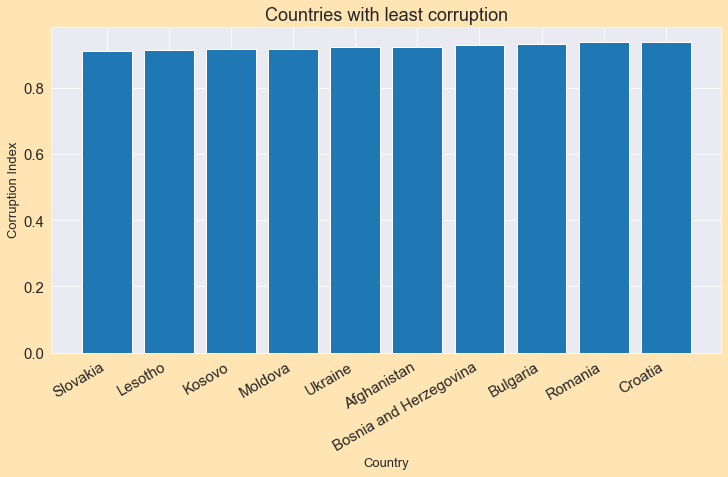

In [75]:
plt.rcParams['figure.figsize'] = (12,6)
plt.title('Countries with least corruption')
plt.xlabel('Country', fontsize=13)
plt.ylabel('Corruption Index', fontsize=13)
plt.xticks(rotation=30, ha='right')
plt.bar(country.country_name, country.perceptions_of_corruption);

## Visualisation : Corruption vs Happiness Score

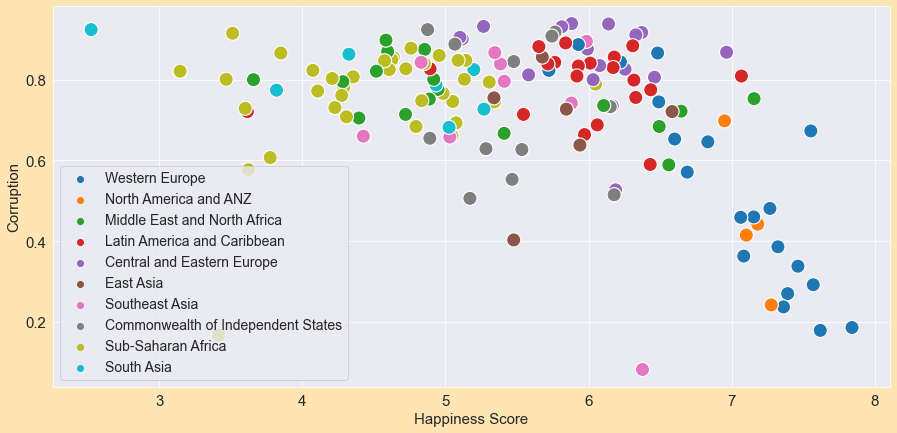

In [77]:
plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x=happy_df.happiness_score, y=happy_df.perceptions_of_corruption, hue=happy_df.regional_indicator, s=200)
plt.legend(loc='best', fontsize='14')
plt.xlabel('Happiness Score')
plt.ylabel('Corruption');

## Find out the Southeast asian country with corruption index less than 0.2

In [95]:
x = happy_df.groupby('regional_indicator')

x.get_group('Southeast Asia')[['country_name','perceptions_of_corruption']].query('perceptions_of_corruption < 0.2')

,country_name,perceptions_of_corruption
31,Singapore,0.082
